In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from hyperopt import hp, tpe, Trials, fmin, STATUS_OK

In [2]:
data = np.load('Wafer_data/Wafer_Map_Datasets.npz')
print(data.files)

['arr_0', 'arr_1']


In [3]:
X = data['arr_0'] #Images
y = data['arr_1'] #Labels

In [4]:
#Flatten the images
X = X.reshape(X.shape[0], -1)

In [5]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
space = {'n_estimators': hp.quniform('n_estimators', 50, 1000, 1),
         'max_depth': hp.quniform('max_depth', 3, 100, 1),
         'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1),
         'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1),
         'max_features': hp.choice('max_features', ['sqrt', 'log2'])
         }

In [7]:
def objective(params):
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
    params['min_samples_split'] = int(params['min_samples_split'])
    params['min_samples_leaf'] = int(params['min_samples_leaf'])

    rf = RandomForestClassifier(n_estimators=params['n_estimators'],
                                max_depth=params['max_depth'],
                                min_samples_split=params['min_samples_split'],
                                min_samples_leaf=params['min_samples_leaf'],
                                max_features=params['max_features'],
                                random_state=0)
    
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {'loss': -accuracy, 'status': STATUS_OK}

In [8]:
trials = Trials()
best_params = fmin(fn = objective, space = space, algo=tpe.suggest, max_evals=100, trials=trials, rstate=np.random.default_rng(0))

100%|██████████| 100/100 [4:53:25<00:00, 176.06s/trial, best loss: -0.515059844798106]  


In [11]:
best_rf_model = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=['sqrt', 'log2'][best_params['max_features']],
    random_state=0
)

In [12]:
#Training the best model
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=39, min_samples_split=8, n_estimators=933,
                       random_state=0)

In [13]:
#Metrics
y_pred = best_rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)
print(classification_report(y_test, y_pred))

Accuracy: 0.515059844798106
              precision    recall  f1-score   support

           0       0.92      0.78      0.85      2571
           1       1.00      0.85      0.92      2443
           2       1.00      0.87      0.93      2567
           3       0.96      1.00      0.98      2393
           4       0.89      0.69      0.78      3613
           5       1.00      0.62      0.77        32
           6       0.70      0.85      0.76      3813
           7       0.96      1.00      0.98       164

   micro avg       0.88      0.83      0.86     17596
   macro avg       0.93      0.83      0.87     17596
weighted avg       0.89      0.83      0.86     17596
 samples avg       0.85      0.82      0.81     17596



c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jared\OneDrive - ateneo.edu\ADMU\Years\3rd Year\1st Sem\CSCI 114\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `

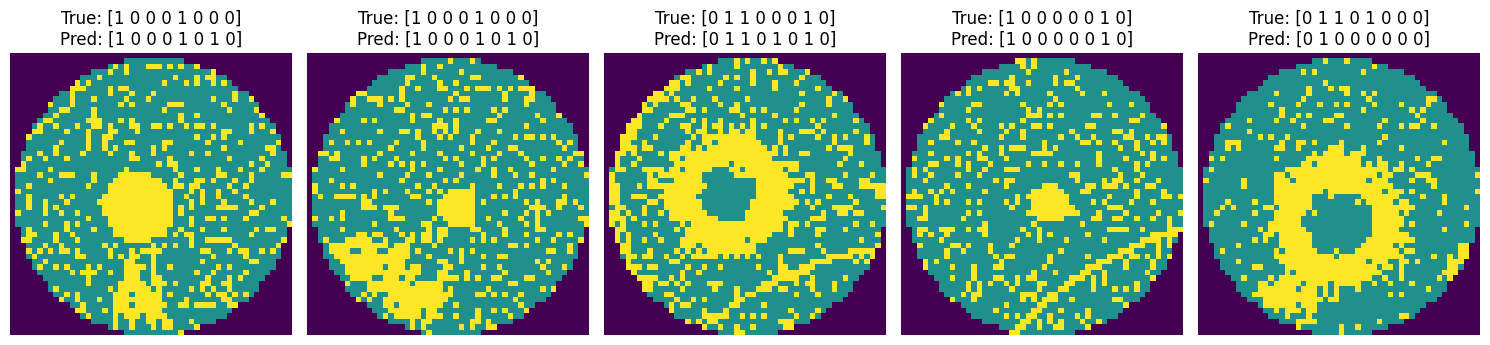

In [14]:
def visualize_results(X_test, y_test, y_pred, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(X_test[i].reshape(52, 52))
        plt.title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_results(X_test, y_test, y_pred, num_images=5)

In [15]:
import joblib

#Saving Model to external file
joblib.dump(best_rf_model, 'best_rf_model.pkl')

['best_rf_model.pkl']